# Graficando metricas de INEGI
pasos:
* Explorar mapa nacional
* Explotat mapa municipal
* Explorar dataset Enigh
* Crear un nuevo gdf, con mapa municipal y Enigh dataset

In [31]:
# importing libraries
import pandas as pd
import geopandas as gpd


#### * Explorar mapa nacional

<Axes: >

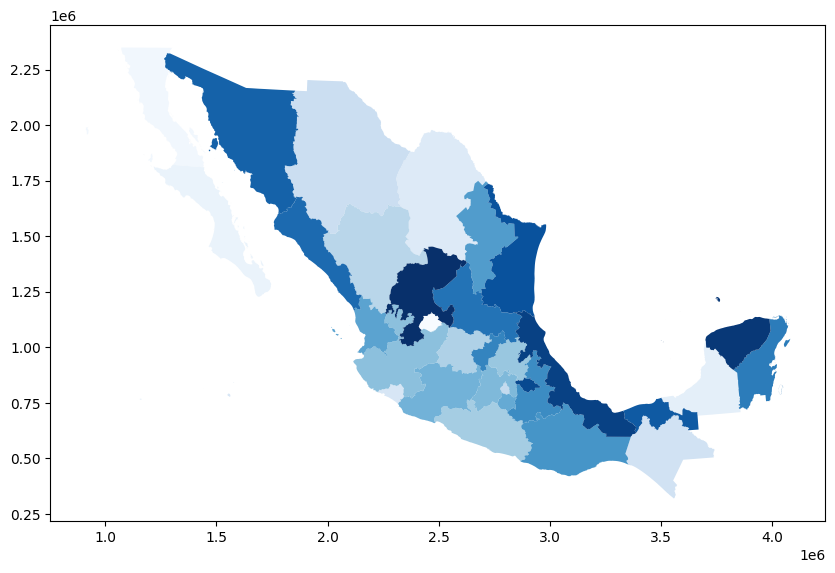

In [32]:
# national map89
mx_nat_map = gpd.read_file('Maps_Mx/MG_2020_Integrado/conjunto_de_datos/00ent.shp')
mx_nat_map.plot(figsize=(10,20), cmap='Blues')

In [33]:
# columnas del nacional
print(mx_nat_map.columns)
mx_nat_map.head()

Index(['CVEGEO', 'CVE_ENT', 'NOMGEO', 'geometry'], dtype='object')


,CVEGEO,CVE_ENT,NOMGEO,geometry
0,01,01,Aguascalientes,"POLYGON ((2470517.824 1155028.588, 2470552.248..."
1,02,02,Baja California,"MULTIPOLYGON (((1493197.166 1849625.247, 14934..."
2,03,03,Baja California Sur,"MULTIPOLYGON (((1694656.344 1227647.637, 16946..."
3,04,04,Campeche,"MULTIPOLYGON (((3544897.199 946994.621, 354491..."
4,05,05,Coahuila de Zaragoza,"POLYGON ((2469954.193 1978522.993, 2469982.807..."


#### * Explotat mapa municipal

<Axes: >

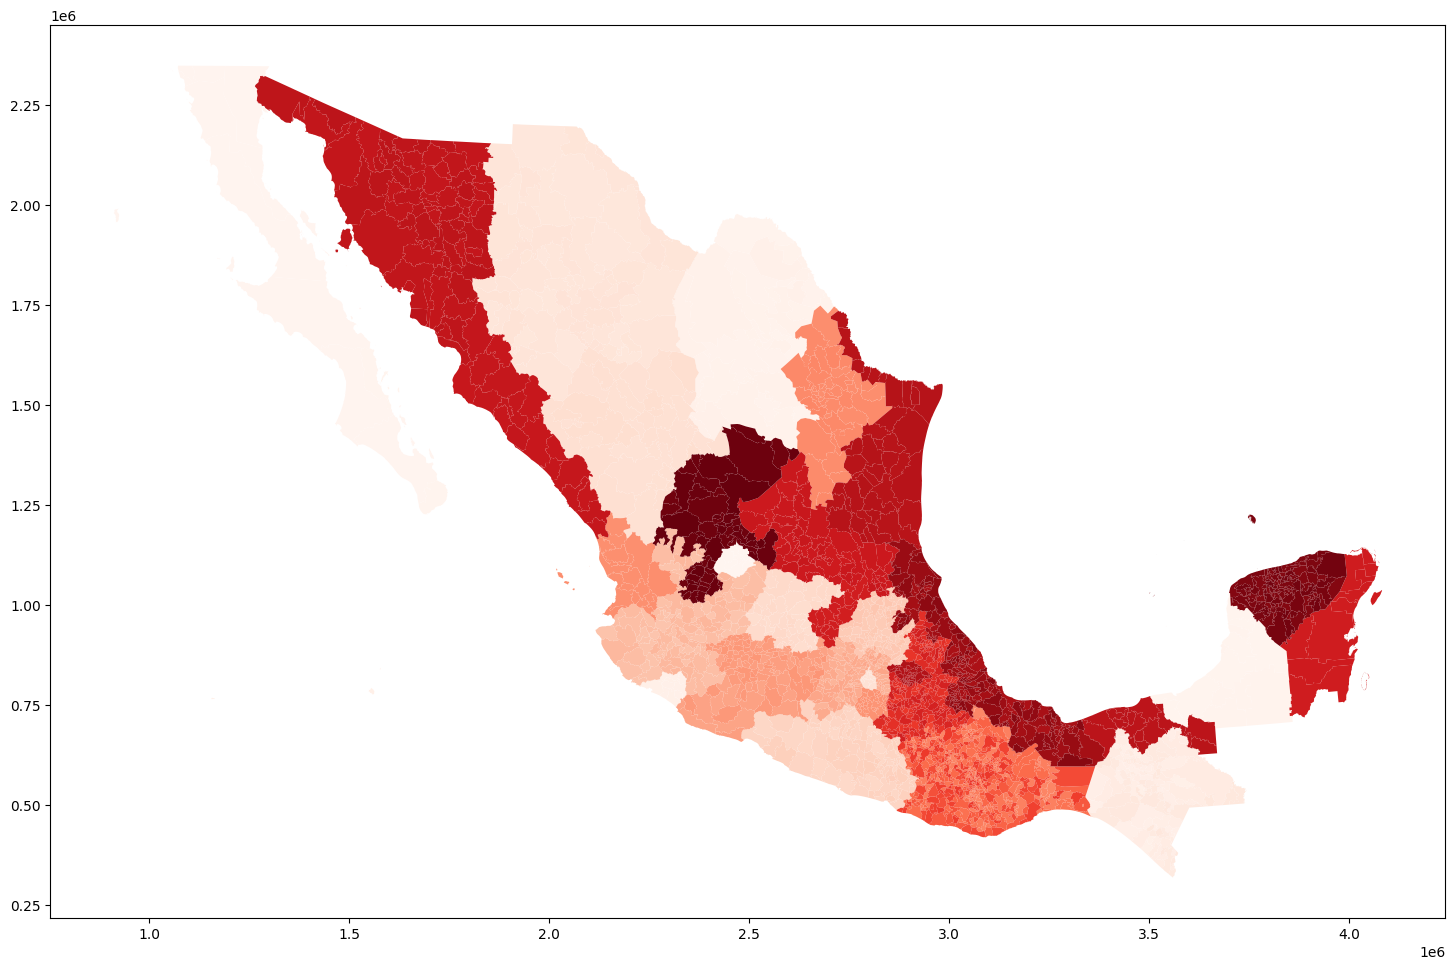

In [34]:
# municipal map
mx_mun_map = gpd.read_file('Maps_Mx/MG_2020_Integrado/conjunto_de_datos/00mun.shp')
mx_mun_map.plot(figsize=(18,25),cmap='Reds', legend=True)

In [35]:
# columnas del municipal
print(mx_mun_map.columns)
mx_mun_map.head()

Index(['CVEGEO', 'CVE_ENT', 'CVE_MUN', 'NOMGEO', 'geometry'], dtype='object')


,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry
0,01001,01,001,Aguascalientes,"POLYGON ((2489072.503 1115771.584, 2489352.774..."
1,01002,01,002,Asientos,"POLYGON ((2494680.261 1141224.506, 2494749.948..."
2,01003,01,003,Calvillo,"POLYGON ((2429607.454 1120262.254, 2429071.902..."
3,01004,01,004,Cosío,"POLYGON ((2470517.824 1155028.588, 2470552.248..."
4,01005,01,005,Jesús María,"POLYGON ((2465526.729 1114740.466, 2465752.546..."


En CVEGEO los primeros dos numeros es la clave del estado y los otros tres  son la clave del municipio

### Cargando encuesta nacional por hogares
#### * Explorar dataset Enigh

In [36]:
enigh = pd.read_csv('''conjunto_de_datos_enigh_ns_2022_csv/conjunto_de_datos_concentradohogar_enigh2022_ns/conjunto_de_datos/conjunto_de_datos_concentradohogar_enigh2022_ns.csv''')
enigh.shape

(90102, 126)

In [37]:
enigh.columns.values

array(['folioviv', 'foliohog', 'ubica_geo', 'tam_loc', 'est_socio',
       'est_dis', 'upm', 'factor', 'clase_hog', 'sexo_jefe', 'edad_jefe',
       'educa_jefe', 'tot_integ', 'hombres', 'mujeres', 'mayores',
       'menores', 'p12_64', 'p65mas', 'ocupados', 'percep_ing',
       'perc_ocupa', 'ing_cor', 'ingtrab', 'trabajo', 'sueldos',
       'horas_extr', 'comisiones', 'aguinaldo', 'indemtrab', 'otra_rem',
       'remu_espec', 'negocio', 'noagrop', 'industria', 'comercio',
       'servicios', 'agrope', 'agricolas', 'pecuarios', 'reproducc',
       'pesca', 'otros_trab', 'rentas', 'utilidad', 'arrenda', 'transfer',
       'jubilacion', 'becas', 'donativos', 'remesas', 'bene_gob',
       'transf_hog', 'trans_inst', 'estim_alqu', 'otros_ing', 'gasto_mon',
       'alimentos', 'ali_dentro', 'cereales', 'carnes', 'pescado',
       'leche', 'huevo', 'aceites', 'tuberculo', 'verduras', 'frutas',
       'azucar', 'cafe', 'especias', 'otros_alim', 'bebidas', 'ali_fuera',
       'tabaco', 'vesti

* ubica_geo: clave de identificar objeto geografico de donde esta el hogar
* tam_loc: tamaño de localidad
* jefe de familia
* tot_integ: integrandes de la familia

In [38]:
# campo geofrafico primer numero es clave de estado y los otros tres numeros sn la clave del municipio
enigh['ubica_geo']

0         1001
1         1001
2         1001
3         1001
4         1001
         ...  
90097    32046
90098    32046
90099    32046
90100    32046
90101    32046
Name: ubica_geo, Length: 90102, dtype: int64

#### * Crear un nuevo gdf, con mapa municipal y Enigh dataset

Columnas en comun entre los dos datasets: 

* enigh['ubica_geo'] 
* mx_mun_map['CVEGEO']

1) Asegurarse que las columnas tienen el mismo tipo de dato

In [39]:
enigh['ubica_geo'] .info()

<class 'pandas.core.series.Series'>
RangeIndex: 90102 entries, 0 to 90101
Series name: ubica_geo
Non-Null Count  Dtype
--------------  -----
90102 non-null  int64
dtypes: int64(1)
memory usage: 704.1 KB


'ubica_geo' es del tipo int

In [40]:
mx_mun_map['CVEGEO'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2469 entries, 0 to 2468
Series name: CVEGEO
Non-Null Count  Dtype 
--------------  ----- 
2469 non-null   object
dtypes: object(1)
memory usage: 19.4+ KB


'CVEGEO' es del tipo object, hay que convertirlo a tipo ing

In [41]:
mx_mun_map['CVEGEO'] = mx_mun_map['CVEGEO'].astype('int')
mx_mun_map['CVEGEO'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2469 entries, 0 to 2468
Series name: CVEGEO
Non-Null Count  Dtype
--------------  -----
2469 non-null   int64
dtypes: int64(1)
memory usage: 19.4 KB


2. Homologando el nombre de ambas columnas

In [42]:
mx_mun_map = mx_mun_map.rename(columns={'CVEGEO':'ubica_geo'})
mx_mun_map.columns

Index(['ubica_geo', 'CVE_ENT', 'CVE_MUN', 'NOMGEO', 'geometry'], dtype='object')

3. Haciendo merge

In [43]:
print('Dataset dimensions: "mx_mun_map" ', mx_mun_map.shape, '\n Dataset dimensions: "enigh" ', enigh.shape)

Dataset dimensions: "mx_mun_map"  (2469, 5) 
 Dataset dimensions: "enigh"  (90102, 126)


In [44]:
# juntando los dos df
gpd_merged = mx_mun_map.merge(enigh, on ='ubica_geo')
gpd_merged.shape

(90102, 130)

In [45]:
# Haciendo el conteo si son hombres o mujeres
genre = gpd_merged.groupby('ubica_geo').agg({'sexo_jefe': lambda x: ((x == 1).sum(), (x == 2).sum())}).reset_index()
genre

,ubica_geo,sexo_jefe
0,1001,"(1053, 491)"
1,1002,"(129, 34)"
2,1003,"(123, 47)"
3,1004,"(15, 3)"
4,1005,"(182, 79)"
...,...,...
1127,32053,"(50, 16)"
1128,32054,"(46, 9)"
1129,32055,"(28, 8)"
1130,32056,"(161, 86)"


In [46]:
# creando un DF
genre[['hombres', 'mujeres']] = pd.DataFrame(genre['sexo_jefe'].tolist(), index=genre.index)
genre

,ubica_geo,sexo_jefe,hombres,mujeres
0,1001,"(1053, 491)",1053,491
1,1002,"(129, 34)",129,34
2,1003,"(123, 47)",123,47
3,1004,"(15, 3)",15,3
4,1005,"(182, 79)",182,79
...,...,...,...,...
1127,32053,"(50, 16)",50,16
1128,32054,"(46, 9)",46,9
1129,32055,"(28, 8)",28,8
1130,32056,"(161, 86)",161,86


In [47]:
# diferencia
genre['differ'] = genre['mujeres'] - genre['hombres']
genre.columns

Index(['ubica_geo', 'sexo_jefe', 'hombres', 'mujeres', 'differ'], dtype='object')

In [48]:
gpd_merged_genre = gpd_merged.merge(genre[['ubica_geo', 'differ']], on='ubica_geo')


<Axes: >

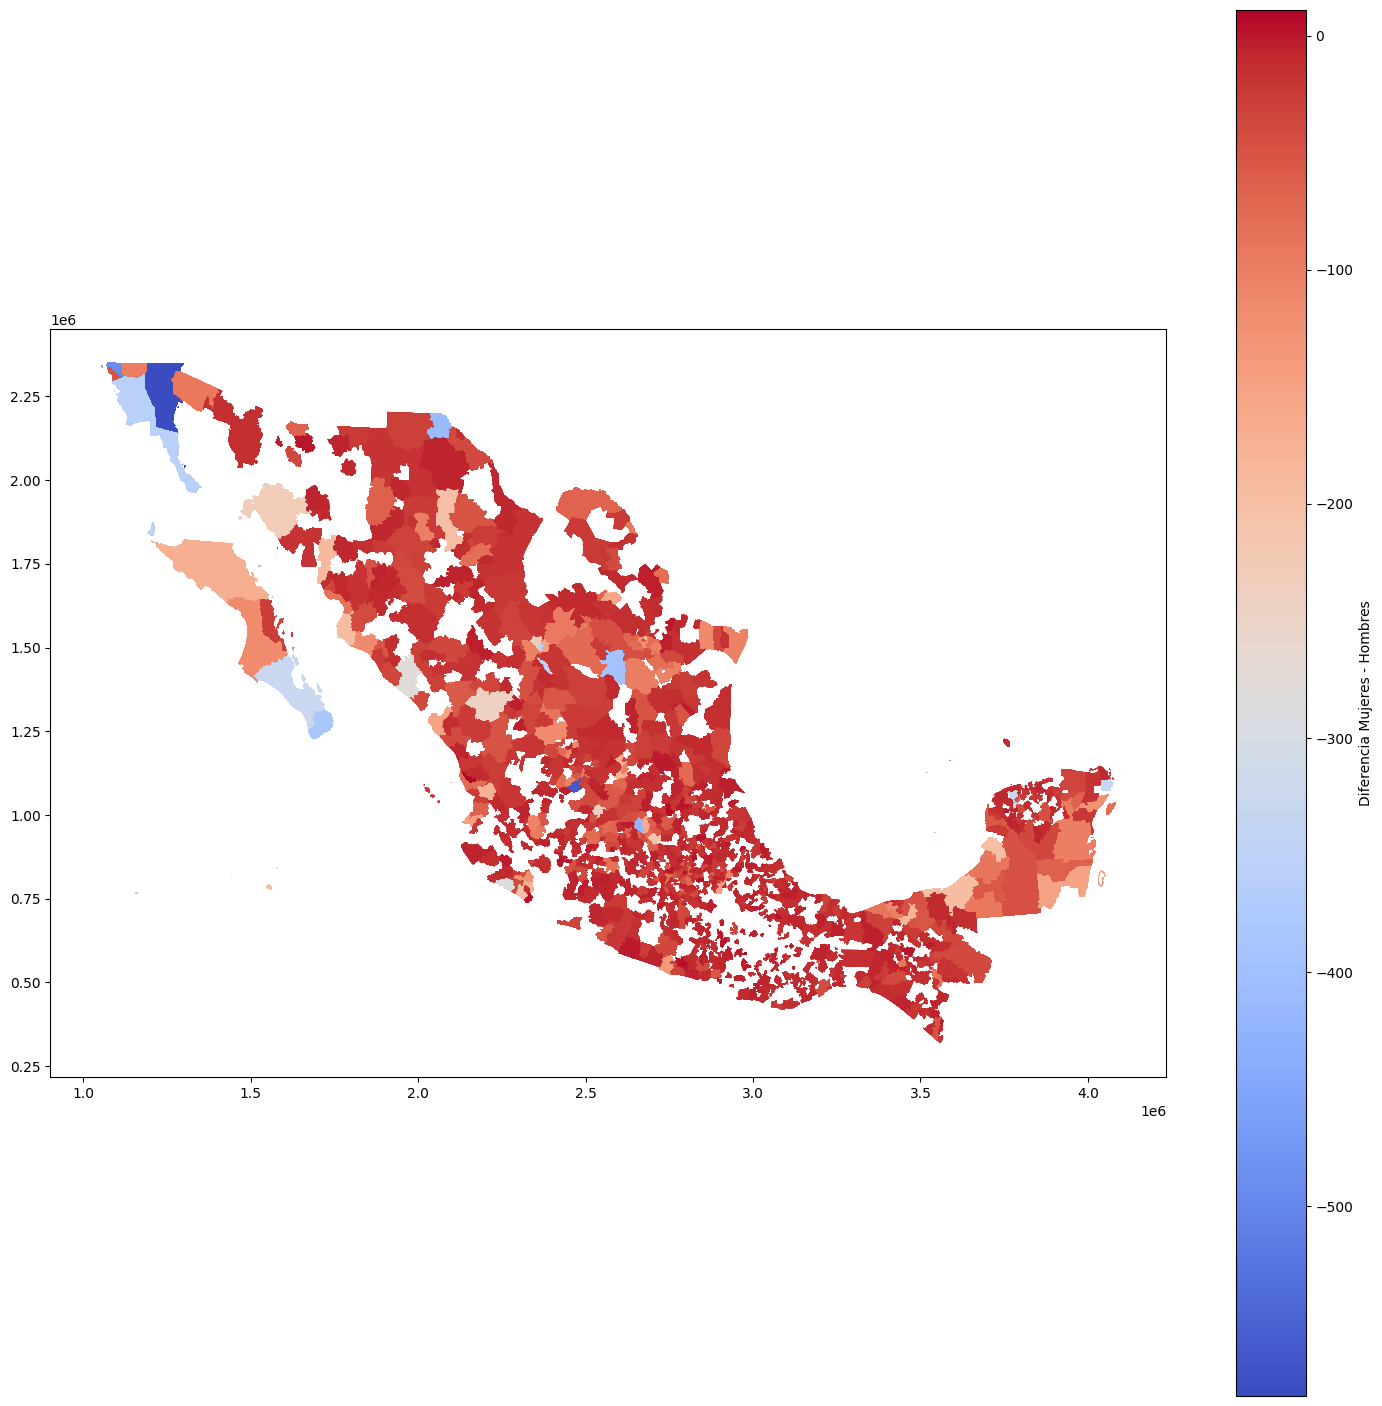

In [49]:
gpd_merged_genre.plot(
    column='differ',
    cmap='coolwarm',
    legend=True,
    legend_kwds={'label': "Diferencia Mujeres - Hombres"},
    figsize=(18, 18)
)


In [50]:
# porcentaje de hombres jefes de familia
genre['porc'] = genre['hombres'] /( genre['mujeres'] + genre['hombres'])
genre.columns

Index(['ubica_geo', 'sexo_jefe', 'hombres', 'mujeres', 'differ', 'porc'], dtype='object')

In [51]:
gpd_merged_genre_porc = gpd_merged.merge(genre[['ubica_geo', 'porc']], on='ubica_geo')

<Axes: >

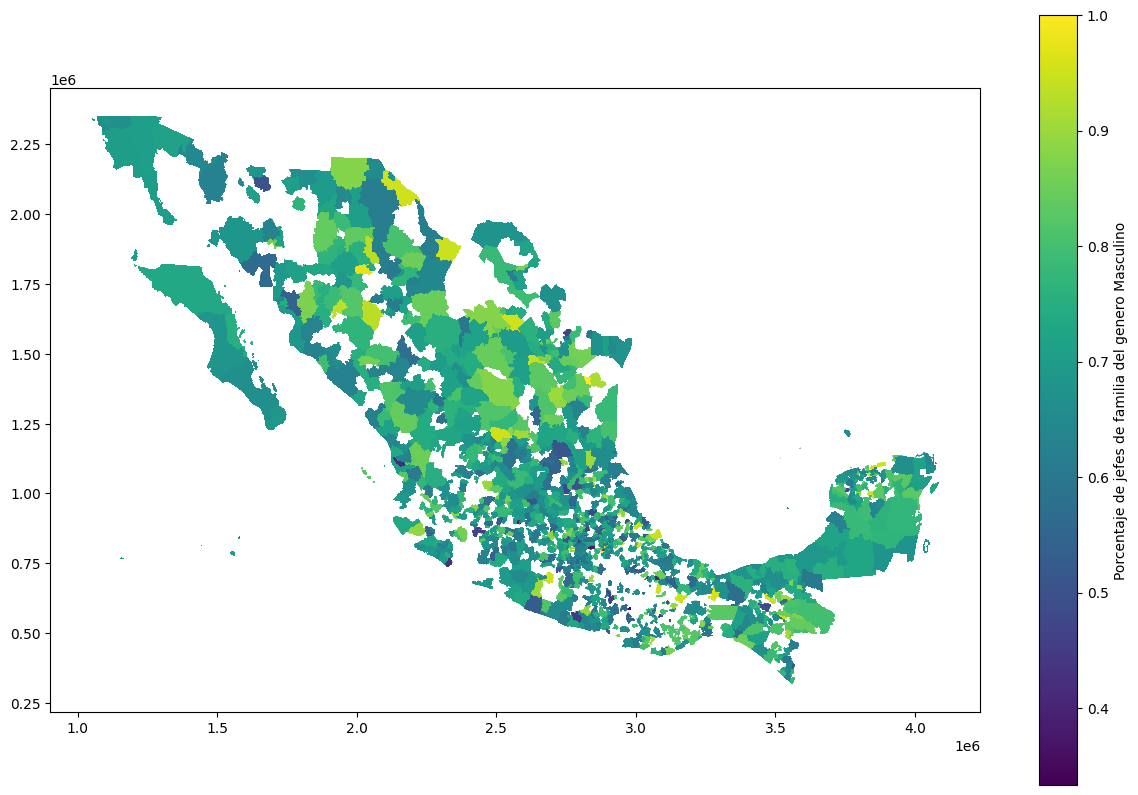

In [52]:
gpd_merged_genre_porc.plot(
    column='porc',
    #cmap='coolwarm',
    legend=True,
    legend_kwds={'label': "Porcentaje de jefes de familia del genero Masculino"},
    figsize=(15, 10)
)

In [53]:
#https://www.youtube.com/watch?v=WTVCXIjdMYc